In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.shape

(10000, 14)

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
data.drop(columns = ["RowNumber","CustomerId","Surname"],axis = 1, inplace = True)

In [11]:
data[data["Balance"]==0.00]  #around 36% of data has 0.0 balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [12]:
data[data["Balance"]!=0.00]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


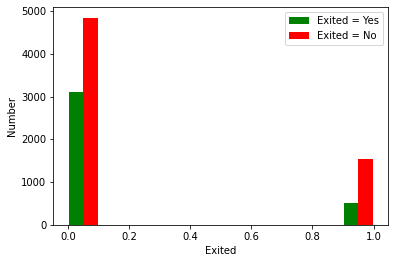

In [13]:
from matplotlib import pyplot as plt
plt.xlabel("Exited")
plt.ylabel("Number")
data_0 = data[data["Balance"]==0.0].Exited
data_1 = data[data["Balance"] != 0.0].Exited
plt.hist([data_0, data_1], rwidth = 0.95, color = ["green", "red"], label = ["Exited = Yes", "Exited = No"])
plt.legend()
plt.show()

In [14]:
print(data["Gender"].value_counts())
data["Gender"].replace({"Female" : 0, "Male" : 1}, inplace = True)

Male      5457
Female    4543
Name: Gender, dtype: int64


In [15]:
print(data["Geography"].unique())
print(data['Geography'].value_counts())
data["Geography"].replace({"France":1, "Spain":3, "Germany":2}, inplace = True)

['France' 'Spain' 'Germany']
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [16]:
data["Balance"].replace(0.0,data["Balance"].mean(), inplace = True)

In [17]:
data["Exited"].value_counts() #highly imbalanced data. We need to oversample it

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_norm = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

data[col_norm] = scaler.fit_transform(data[col_norm])

In [19]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0,0.324324,0.2,0.294247,1,1,1,0.506735,1
1,0.516,3,0,0.310811,0.1,0.323876,1,0,1,0.562709,0
2,0.304,1,0,0.324324,0.8,0.630812,3,1,0,0.569654,1
3,0.698,1,0,0.283784,0.1,0.294247,2,0,0,0.469120,0
4,1.000,3,0,0.337838,0.2,0.492625,1,1,1,0.395400,0


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
X = data.drop("Exited", axis = 1)
y = data["Exited"]

In [22]:
smote = SMOTE(sampling_strategy = "minority")
X_sm, y_sm = smote.fit_resample(X,y)

In [23]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 123, stratify = y_sm)

In [25]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6037,0.722000,3,1,0.189189,0.500000,0.294247,2,1,1,0.738614
13094,0.422893,1,0,0.445780,0.163302,0.543610,3,1,0,0.125043
3466,0.882000,1,1,0.135135,0.400000,0.294247,1,1,0,0.872203
3304,0.502000,2,1,0.229730,0.800000,0.274290,1,1,0,0.886949
2483,0.800000,1,1,0.256757,0.300000,0.294247,2,1,0,0.084301


In [27]:
y_train.head()

6037     0
13094    1
3466     0
3304     0
2483     0
Name: Exited, dtype: int64

In [30]:
X_train.shape,y_train.shape

((11944, 10), (11944,))

In [31]:
X_test.shape, y_test.shape

((3982, 10), (3982,))

In [32]:
from tensorflow import keras
model1 = keras.Sequential([
                          keras.layers.Dense(10, input_shape = (10,), activation = "relu"),
                          keras.layers.Dense(5, activation = "relu"),
                          keras.layers.Dense(2, activation = "relu"),
                          keras.layers.Dense(1, activation = "sigmoid")                    
                          ])
  
model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model1.fit(X_train, y_train, epochs = 200)#, validation_data = (X_test, y_test), validation_split = 0.25, verbose = 0)

Epoch 1/200
374/374 [==============================] - 2s 2ms/step - loss: 0.6773 - accuracy: 0.5934
Epoch 2/200
374/374 [==============================] - 1s 3ms/step - loss: 0.6496 - accuracy: 0.6551
Epoch 3/200
374/374 [==============================] - 1s 2ms/step - loss: 0.6200 - accuracy: 0.6852
Epoch 4/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5920 - accuracy: 0.7083
Epoch 5/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5730 - accuracy: 0.7196
Epoch 6/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7242
Epoch 7/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7298
Epoch 8/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.7387
Epoch 9/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7403
Epoch 10/200
374/374 [==============================] - 1s 2ms/step - loss: 0.5320 - accura

In [33]:
model1.evaluate(X_test, y_test)

125/125 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.7878


[0.44871145486831665, 0.7877950668334961]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model1.predict(X_test)
y_pred = np.round(y_pred)
print("Classification report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Accuracy : \n", accuracy_score(y_test, y_pred))

125/125 [==============================] - 0s 2ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1991
           1       0.79      0.79      0.79      1991

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.79      0.79      0.79      3982

Confusion Matrix: 
 [[1563  428]
 [ 417 1574]]
Accuracy : 
 0.7877950778503264
